<a href="https://colab.research.google.com/github/Aleksandr62aa/AI_ML_DL/blob/main/CNN_YOLO8_Traffic_lights_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Detecting objects in images (612 x 415) using a trained neural network YOLOv8**

**Dataset traffic lights and road signs**

**Transfer Learning**

In [1]:
# Connecting google drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
# dataset from google drive
data_root = '/content/gdrive/MyDrive/road_signs'

In [3]:
# Importing libraries
import os
import shutil
from tqdm import tqdm
import torch

In [4]:
# Setup YOLO
!pip install ultralytics
from ultralytics import YOLO

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.5/644.5 kB 14.1 MB/s eta 0:00:00


**Training procedure**

In [5]:
# load model
model = YOLO("yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 141MB/s]


In [6]:
# load 'data.yaml'
data_yaml = 'data.yaml'
shutil.copy(os.path.join(data_root, data_yaml),data_yaml)

'data.yaml'

In [7]:
# train model
epochs = 10
model.train(data='data.yaml', batch=16, epochs=epochs)

Ultralytics YOLOv8.0.200 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ab19ff60c40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0

**Perform inference**

In [17]:
# load train model
model = YOLO("best.pt")
# model = YOLO("/content/runs/detect/train/weights/best.pt")


image 1/1 /content/signs2.jpg: 448x640 1 green_light, 1 red_light, 1 yellow_light, 12.7ms
Speed: 2.7ms preprocess, 12.7ms inference, 2.6ms postprocess per image at shape (1, 3, 448, 640)


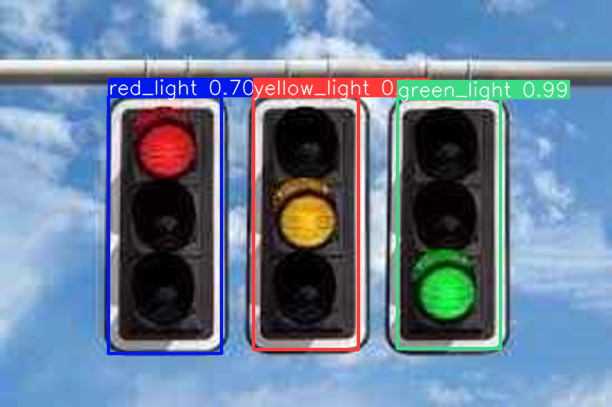

In [18]:
# set image
image = "signs2.jpg"

# perform inference
results = model.predict(image)
result = results[0]

# show results on image
from PIL import Image
Image.fromarray(result.plot()[:,:,::-1])


image 1/1 /content/signs3.jpg: 448x640 2 red_lights, 9.0ms
Speed: 6.6ms preprocess, 9.0ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)


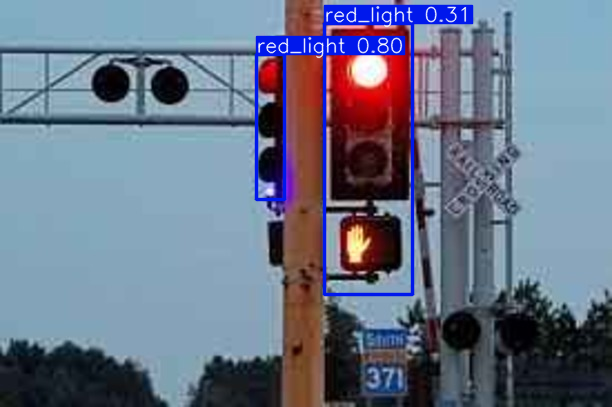

In [15]:
# set image
image = "signs3.jpg"

# perform inference
results = model.predict(image)
result = results[0]

# show results on image
from PIL import Image
Image.fromarray(result.plot()[:,:,::-1])


image 1/1 /content/signs4.jpg: 384x640 1 green_light, 1 red_light, 12.0ms
Speed: 2.5ms preprocess, 12.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


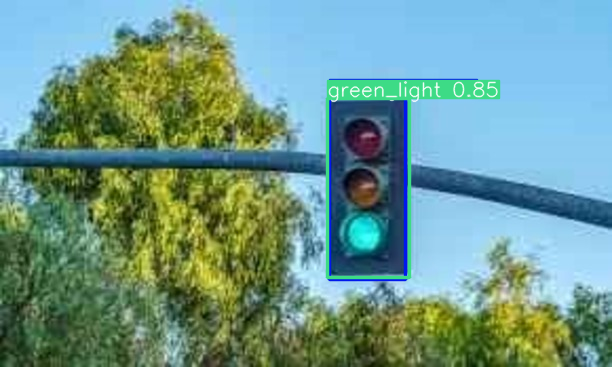

In [16]:
# set image
image = "signs4.jpg"

# perform inference
results = model.predict(image)
result = results[0]

# show results on image
from PIL import Image
Image.fromarray(result.plot()[:,:,::-1])